In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #Regular Expressions
import string #importing string functions
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer

In [2]:
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
from xgboost import XGBClassifier

In [4]:
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [5]:
perfect_submission = pd.read_csv(
    "https://raw.githubusercontent.com/mitramir55/Kaggle_NLP_competition/master/perfect_submission.csv"
    , sep=",")    # provides the correct targets for test set

In [6]:
train = pd.read_csv("/Users/amrita/Desktop/train.csv", sep=",") 
test = pd.read_csv('/Users/amrita/Desktop/test .csv', sep=",")

In [7]:
test["target"] = perfect_submission["target"]

test.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [8]:
test

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [9]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


The data is already split into test and train sets. Data size is 10876 records in total; 7613 in the training set and 3263 in the testing set. Train and test sets contain these columns:

id:- a unique identifier for each tweet.

text:- the text of the tweet.

location:- the tweet location (may be blank).

keyword:- tweet search keyword (may be blank).

In [10]:
data = train.append(test)
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


# Check Missing Values

In [11]:
data=data.replace(r'^\s*$', np.NaN, regex=True)

In [12]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data

,column_name,percent_missing
id,id,0.000000
keyword,keyword,0.799926
location,location,33.468187
text,text,0.000000
target,target,0.000000


No missing values in Id, text and target columns.

33% of location values are missing.

0.007% values are missing in keywords.

We will drop 'location'.

In [13]:
data= data.drop('location', axis=1)

In [14]:
data

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
3258,10861,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [15]:
data.tail(300)

,id,keyword,text,target
2963,9807,trapped,Ghost is literally surrounded by people who ar...,0
2964,9809,trauma,Students suffering from trauma ÛÓ like divorc...,0
2965,9811,trauma,RT MME_AUSTIN: Why #Marijuana Is Critical For ...,0
2966,9814,trauma,sickmund: RT NCJFCJ: #NCJFCJ President Judge B...,0
2967,9817,trauma,What I Learned About Fat Dating Trauma Through...,0
...,...,...,...,...
3258,10861,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


# Check Duplicates

In [16]:
data= data.drop_duplicates()

# Check Target Balance

In [17]:
data['target'].value_counts()

0    6203
1    4673
Name: target, dtype: int64

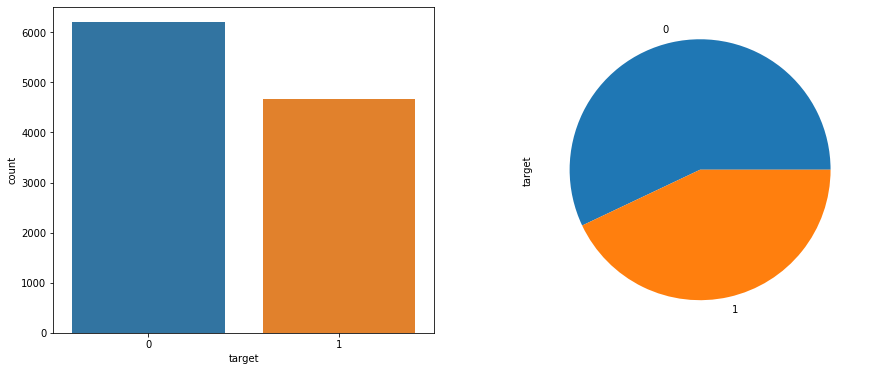

In [18]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=data['target'])
plt.subplot(1, 2, 2)
data['target'].value_counts().plot.pie(y='Class')

From the above plots, it can be observed that the total number of samples in Target Class 1 is 4673 while in Target Class 0, it is about 6203. We can overcome the target balance using downsampling. 

# Downsampling

In [19]:
data.target.value_counts(normalize=False)

0    6203
1    4673
Name: target, dtype: int64

In [20]:
from sklearn.utils import resample
df_majority_1 = data[data.target==0]
df_minority_1 = data[data.target==1]


# Downsample majority class
df_majority_downsampled = resample(df_majority_1, 
                                 replace=False,    # sample without replacement
                                 n_samples=4673,     # to match minority class
                                 random_state=123) # reproducible results

df_downsampled_new = pd.concat([df_majority_downsampled, df_minority_1])

In [21]:
df_downsampled_new.target.value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

In [22]:
# cleaning tweet text

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import nltk

ls = nltk.LancasterStemmer()

def clean_tweet(tweet):

    temp = tweet.lower()
    temp = re.sub(r'http\S+', '', temp)                       # remove links
    temp = re.sub(r'@', ' featurementions ', temp)            # convert mentions to a word token
    temp = re.sub(r' rt ', ' featureretweet ', temp)          # convert retweets to a word token
    temp = re.sub(r'#', ' featurehashtags ', temp)            # convert hashtags to a word token
    temp = re.sub(r'[0-9]+', ' featurenumeric ', temp)        # convert numeric values to a word token
    temp = re.sub(r'[!.:;_,?]+', ' featurepunc ', temp)       # convert punctuations to a word token
    temp = re.sub("[^a-z]"," ", temp)                         # remove any nonalphabatical charactar (punctuation, symbols, numbers,....)
    temp = temp.split()
    temp = [w for w in temp if not w in ENGLISH_STOP_WORDS]   # remove stop words
    temp = " ".join(word for word in temp)
 
    return temp

In [23]:
df_downsampled_new["cleaned_text"] = df_downsampled_new["text"].apply(clean_tweet)

In [24]:
df_downsampled_new

,id,keyword,text,target,cleaned_text
2552,8521,screaming,i'm fucking screaming http://t.co/H3MrqRrGfe,0,m fucking screaming
295,966,blaze,Craving slurpees ;-;,0,craving slurpees featurepunc featurepunc
1055,1524,body%20bags,@asymbina @tithenai I'm hampered by only likin...,0,featurementions asymbina featurementions tithe...
6931,9941,trouble,The worst voice I can ever hear is the 'Nikki...,0,worst voice hear nikki trouble voice mom
2295,3292,demolish,I have completed the quest 'Demolish 5 Murlo.....,0,completed quest demolish featurenumeric murlo ...
...,...,...,...,...,...
3257,10858,NaN,The death toll in a #IS-suicide car bombing on...,1,death toll featurehashtags suicide car bombing...
3259,10865,NaN,Storm in RI worse than last hurricane. My city...,1,storm ri worse hurricane featurepunc city amp ...
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...,1,green line derailment chicago
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1,meg issues hazardous weather outlook hwo


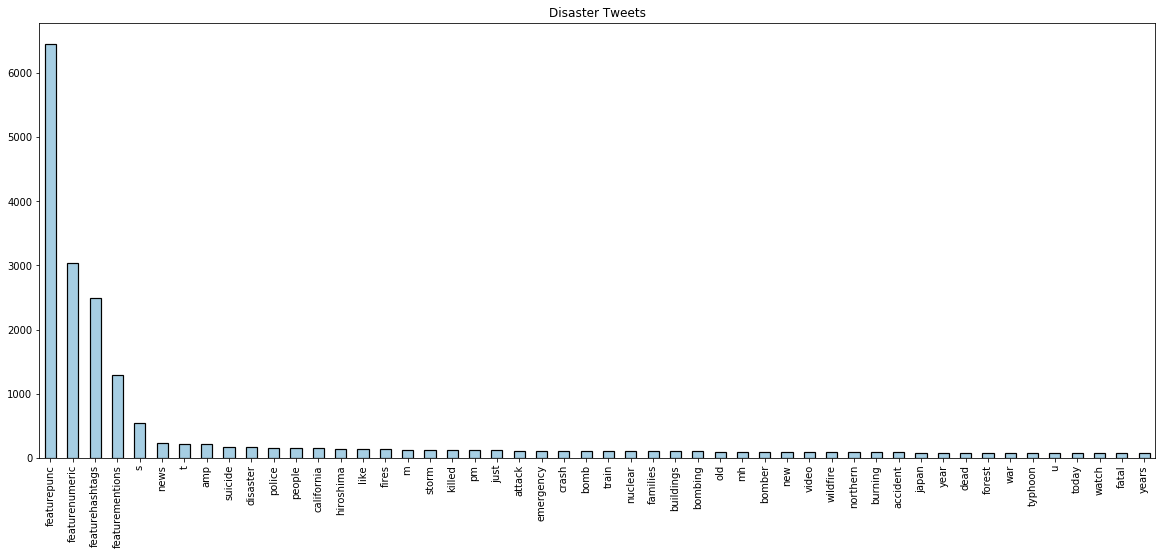

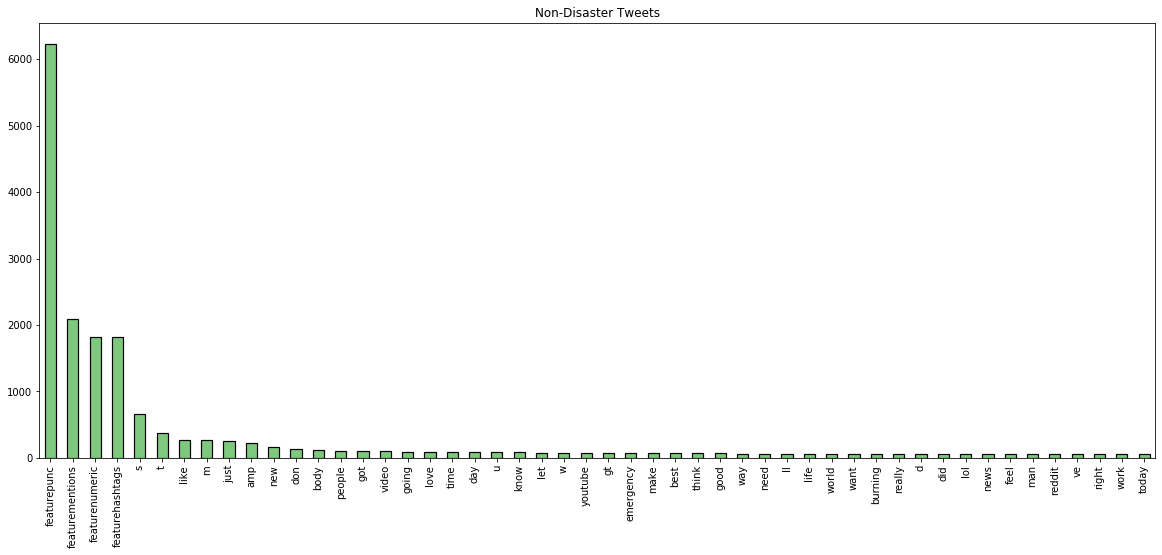

In [25]:
# Analyzing top 50 words

disaster_tweet = df_downsampled_new[df_downsampled_new.target==1]["cleaned_text"]
non_disaster_tweet = df_downsampled_new[df_downsampled_new.target==0]["cleaned_text"]

color = ['Paired','Accent']
splitedData = [disaster_tweet,non_disaster_tweet]
title = ["Disaster Tweets", "Non-Disaster Tweets"]
for item in range(2):
    plt.figure(figsize=(20,8))
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(50).plot(kind='bar',fontsize=10,colormap=color[item],edgecolor='black', linewidth=1.2)
    plt.show()

# Removal of Common Words

In [26]:
common_words = ['featurepunc','featurementions','featurenumeric','featurehashtags','s','t','like','m','just','new','don']

def text_cleaning(df_downsampled_new):
    return ' '.join(i for i in df_downsampled_new.split() if i not in common_words)

df_downsampled_new["cleaner_text"] = df_downsampled_new["cleaned_text"].apply(text_cleaning)

In [27]:
df_downsampled_new

,id,keyword,text,target,cleaned_text,cleaner_text
2552,8521,screaming,i'm fucking screaming http://t.co/H3MrqRrGfe,0,m fucking screaming,fucking screaming
295,966,blaze,Craving slurpees ;-;,0,craving slurpees featurepunc featurepunc,craving slurpees
1055,1524,body%20bags,@asymbina @tithenai I'm hampered by only likin...,0,featurementions asymbina featurementions tithe...,asymbina tithenai hampered liking cross body b...
6931,9941,trouble,The worst voice I can ever hear is the 'Nikki...,0,worst voice hear nikki trouble voice mom,worst voice hear nikki trouble voice mom
2295,3292,demolish,I have completed the quest 'Demolish 5 Murlo.....,0,completed quest demolish featurenumeric murlo ...,completed quest demolish murlo android game tr...
...,...,...,...,...,...,...
3257,10858,NaN,The death toll in a #IS-suicide car bombing on...,1,death toll featurehashtags suicide car bombing...,death toll suicide car bombing ypg position vi...
3259,10865,NaN,Storm in RI worse than last hurricane. My city...,1,storm ri worse hurricane featurepunc city amp ...,storm ri worse hurricane city amp hardest hit ...
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...,1,green line derailment chicago,green line derailment chicago
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1,meg issues hazardous weather outlook hwo,meg issues hazardous weather outlook hwo


# Modelling

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df_downsampled_new["cleaner_text"]
y= df_downsampled_new["target"]

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0001, max_df=0.9999)
vectors = vectorizer.fit_transform(list(x))

x_new = vectorizer.transform(x)

In [66]:
#train_test plot
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.1, random_state=56)

 ** First do the train test split and then do vectorization on the training set only. .fit transform on x_train and then .transform on x_test. Also, perform cross validation

# Supervised Models

In [67]:
accuracy_list = []
f1_list = []
roc_auc_list = []

In [68]:
def result(model):
    
    #fit on data
    model.fit(x_train, y_train)
    
    #prediction train
    pred_train = model.predict(x_train)
    
    #prediction test
    pred_test = model.predict(x_test)
    
    #accuracy of model
    acc = accuracy_score(y_test, pred_test)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()
    
    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred_test))
    print("-" * 100)
    print() 
    
    #f1-score of model
    f1 = f1_score(y_test, pred_test)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()
    
    
    #roc-auc curve of model for train set
    fpr,tpr,threshold = roc_curve(y_train,pred_train)
    auc_value_train = auc(fpr,tpr)
    rocauc_score_train = roc_auc_score(y_train, pred_train)
    roc_auc_list.append(rocauc_score_train)
    plt.figure(figsize=(5,5),dpi=100)
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value_train = %0.3f)" % auc_value_train)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    #roc-auc curve of model for test set
    fpr,tpr,threshold = roc_curve(y_test,pred_test)
    auc_value_test = auc(fpr,tpr)
    rocauc_score_test = roc_auc_score(y_test, pred_test)
    roc_auc_list.append(rocauc_score_test)
    plt.figure(figsize=(5,5),dpi=100)
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value_test = %0.3f)" % auc_value_test)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    
    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

# Logistic Regression

Accuracy Score:  0.7967914438502673
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       484
           1       0.82      0.74      0.78       451

    accuracy                           0.80       935
   macro avg       0.80      0.79      0.80       935
weighted avg       0.80      0.80      0.80       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.7790697674418605
----------------------------------------------------------------------------------------------------



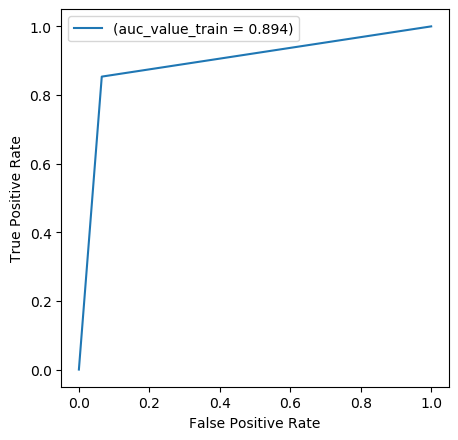

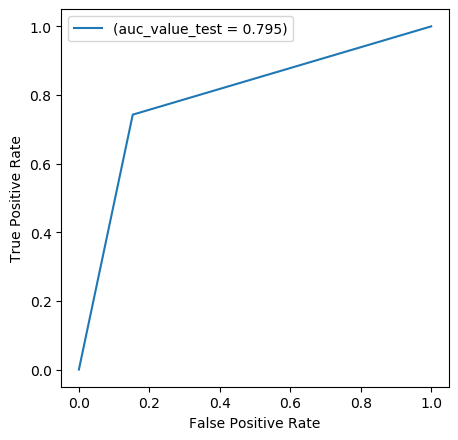

Confusion Matrix: 


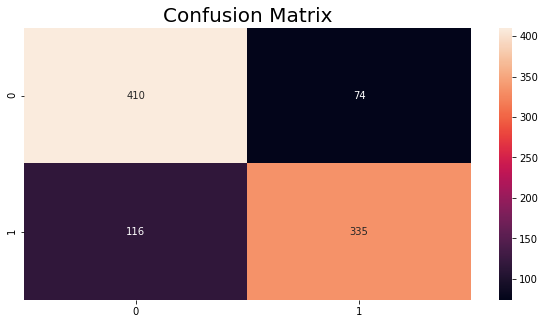

In [69]:
# Logistic Regression

lr = LogisticRegression()
result(lr)

# Random Forest

Accuracy Score:  0.7732620320855615
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       484
           1       0.81      0.69      0.75       451

    accuracy                           0.77       935
   macro avg       0.78      0.77      0.77       935
weighted avg       0.78      0.77      0.77       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.7451923076923077
----------------------------------------------------------------------------------------------------



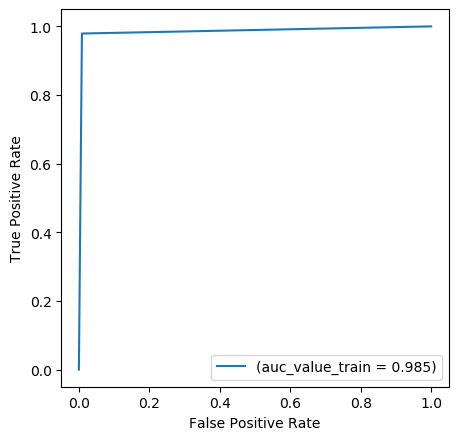

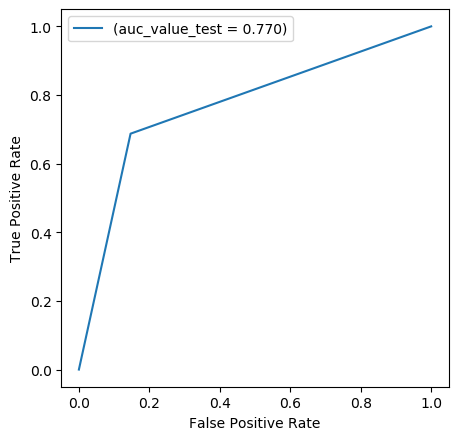

Confusion Matrix: 


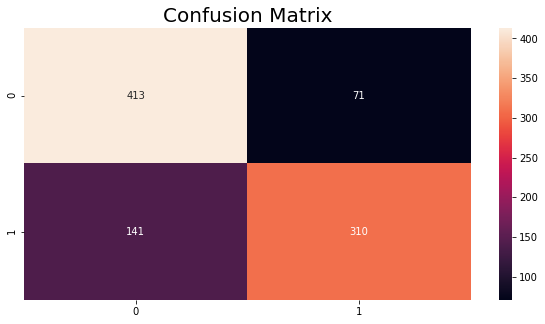

In [70]:
# Random Forest

rf = RandomForestClassifier(criterion = 'entropy')
result(rf)

# KNN 

In [71]:
# KNN classifier

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=8)

Accuracy Score:  0.7486631016042781
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       484
           1       0.86      0.58      0.69       451

    accuracy                           0.75       935
   macro avg       0.78      0.74      0.74       935
weighted avg       0.77      0.75      0.74       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.6887417218543046
----------------------------------------------------------------------------------------------------



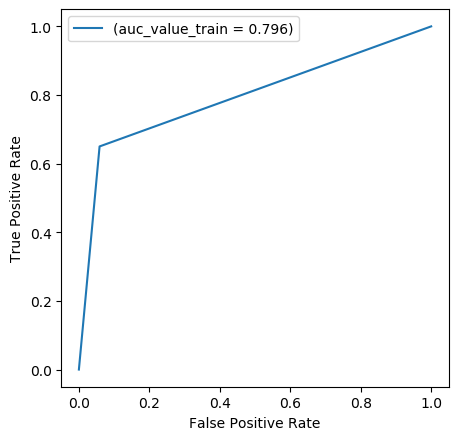

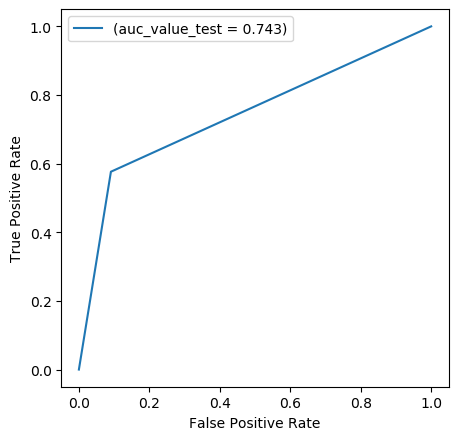

Confusion Matrix: 


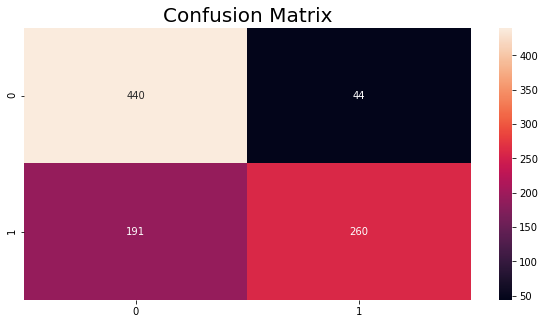

In [72]:
result(KNN)

# Decision Trees

In [73]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(class_weight='balanced')

Accuracy Score:  0.7368983957219252
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75       484
           1       0.73      0.73      0.73       451

    accuracy                           0.74       935
   macro avg       0.74      0.74      0.74       935
weighted avg       0.74      0.74      0.74       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.7266666666666668
----------------------------------------------------------------------------------------------------



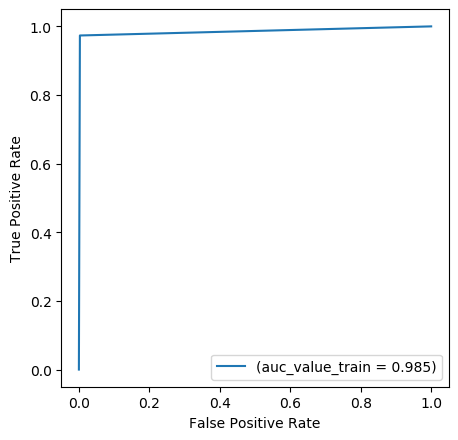

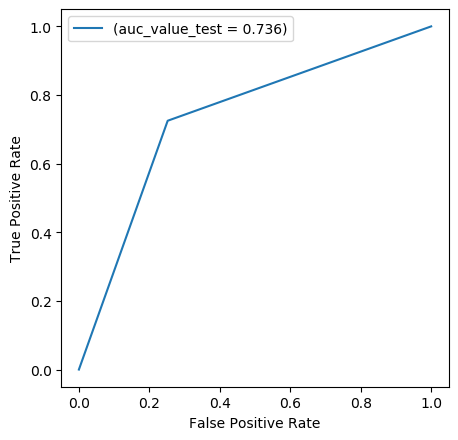

Confusion Matrix: 


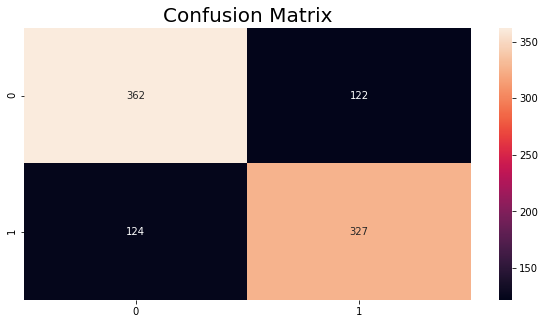

In [74]:
result(DT)

# Naive Bayes

In [75]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Accuracy Score:  0.7903743315508022
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       484
           1       0.78      0.78      0.78       451

    accuracy                           0.79       935
   macro avg       0.79      0.79      0.79       935
weighted avg       0.79      0.79      0.79       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.7822222222222222
----------------------------------------------------------------------------------------------------



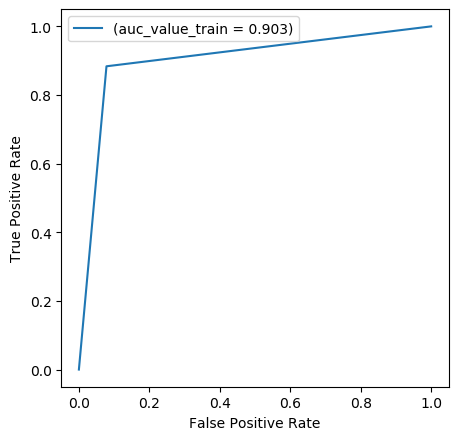

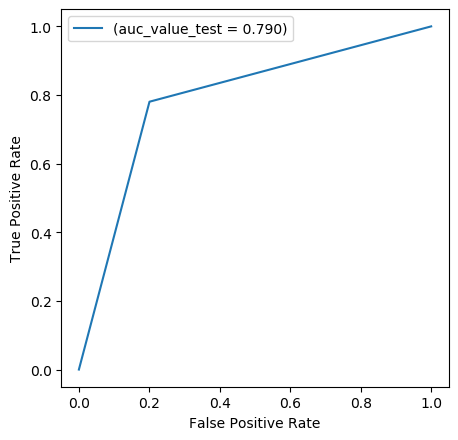

Confusion Matrix: 


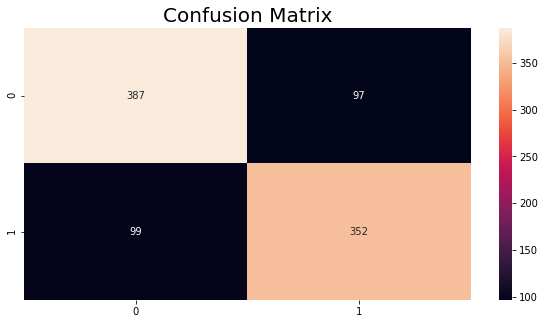

In [76]:
result(model)

# SVM

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune yyperparameters  using Grid Search and a SVM model
model_svc = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1).fit(x_train, y_train)

Accuracy Score:  0.7925133689839572
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       484
           1       0.85      0.69      0.76       451

    accuracy                           0.79       935
   macro avg       0.80      0.79      0.79       935
weighted avg       0.80      0.79      0.79       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.7622549019607843
----------------------------------------------------------------------------------------------------



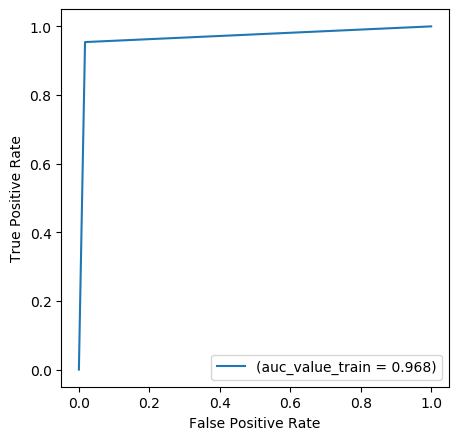

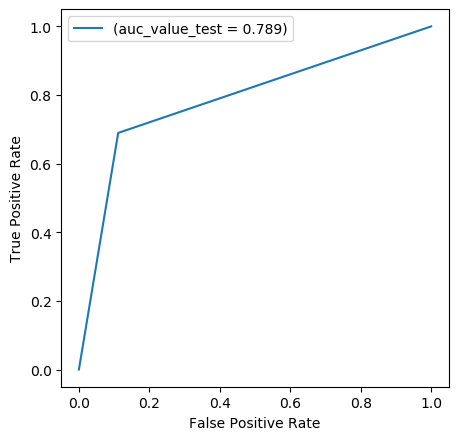

Confusion Matrix: 


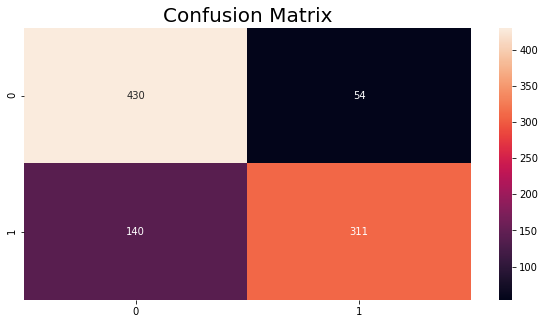

In [78]:
result(model_svc)

# XGBoost Classifier

In [79]:
# XGBoost Classifier
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)

XGBClassifier()

Accuracy Score:  0.7176470588235294
----------------------------------------------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       484
           1       0.84      0.51      0.64       451

    accuracy                           0.72       935
   macro avg       0.75      0.71      0.70       935
weighted avg       0.75      0.72      0.71       935

----------------------------------------------------------------------------------------------------

F1 Score:  0.6373626373626373
----------------------------------------------------------------------------------------------------



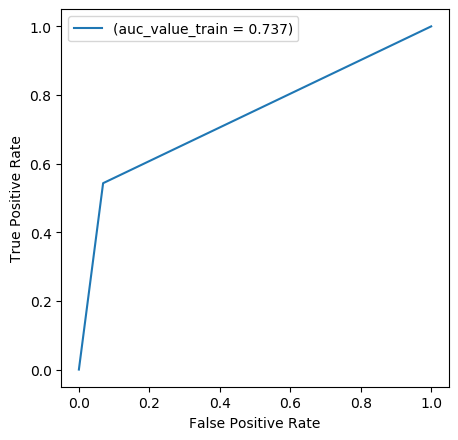

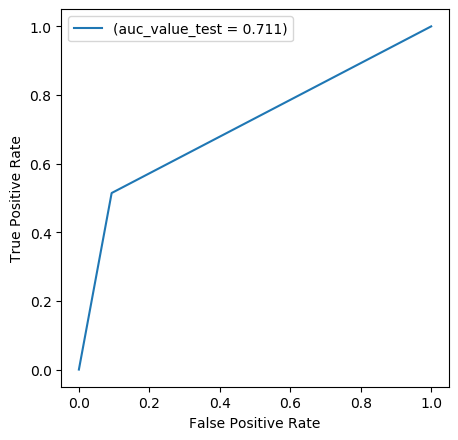

Confusion Matrix: 


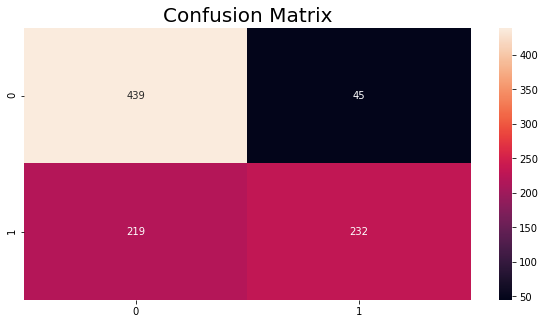

In [80]:
result(model_xg)

# CatBoost Classifier

In [81]:
from catboost import CatBoostClassifier
model_6 = CatBoostClassifier(iterations=100)
model_6.fit(x_train,y_train)

Learning rate set to 0.211273
0:	learn: 0.6750325	total: 180ms	remaining: 17.8s
1:	learn: 0.6668545	total: 251ms	remaining: 12.3s
2:	learn: 0.6562539	total: 320ms	remaining: 10.4s
3:	learn: 0.6477292	total: 394ms	remaining: 9.46s
4:	learn: 0.6434994	total: 481ms	remaining: 9.15s
5:	learn: 0.6387783	total: 552ms	remaining: 8.65s
6:	learn: 0.6330856	total: 628ms	remaining: 8.35s
7:	learn: 0.6289267	total: 700ms	remaining: 8.05s
8:	learn: 0.6251663	total: 770ms	remaining: 7.78s
9:	learn: 0.6198198	total: 853ms	remaining: 7.67s
10:	learn: 0.6163932	total: 973ms	remaining: 7.87s
11:	learn: 0.6119754	total: 1.1s	remaining: 8.08s
12:	learn: 0.6072621	total: 1.22s	remaining: 8.14s
13:	learn: 0.6047735	total: 1.3s	remaining: 7.96s
14:	learn: 0.6008723	total: 1.4s	remaining: 7.91s
15:	learn: 0.5974312	total: 1.48s	remaining: 7.75s
16:	learn: 0.5942827	total: 1.55s	remaining: 7.55s
17:	learn: 0.5913219	total: 1.63s	remaining: 7.4s
18:	learn: 0.5889479	total: 1.71s	remaining: 7.27s
19:	learn: 0.58

Learning rate set to 0.211273
0:	learn: 0.6750325	total: 94.4ms	remaining: 9.35s
1:	learn: 0.6668545	total: 160ms	remaining: 7.86s
2:	learn: 0.6562539	total: 226ms	remaining: 7.29s
3:	learn: 0.6477292	total: 324ms	remaining: 7.76s
4:	learn: 0.6434994	total: 387ms	remaining: 7.35s
5:	learn: 0.6387783	total: 452ms	remaining: 7.09s
6:	learn: 0.6330856	total: 524ms	remaining: 6.96s
7:	learn: 0.6289267	total: 593ms	remaining: 6.82s
8:	learn: 0.6251663	total: 666ms	remaining: 6.74s
9:	learn: 0.6198198	total: 733ms	remaining: 6.59s
10:	learn: 0.6163932	total: 809ms	remaining: 6.54s
11:	learn: 0.6119754	total: 874ms	remaining: 6.41s
12:	learn: 0.6072621	total: 952ms	remaining: 6.37s
13:	learn: 0.6047735	total: 1.03s	remaining: 6.31s
14:	learn: 0.6008723	total: 1.09s	remaining: 6.19s
15:	learn: 0.5974312	total: 1.16s	remaining: 6.06s
16:	learn: 0.5942827	total: 1.22s	remaining: 5.97s
17:	learn: 0.5913219	total: 1.29s	remaining: 5.9s
18:	learn: 0.5889479	total: 1.36s	remaining: 5.8s
19:	learn: 0

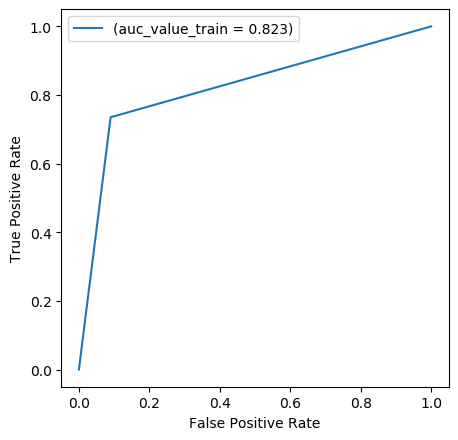

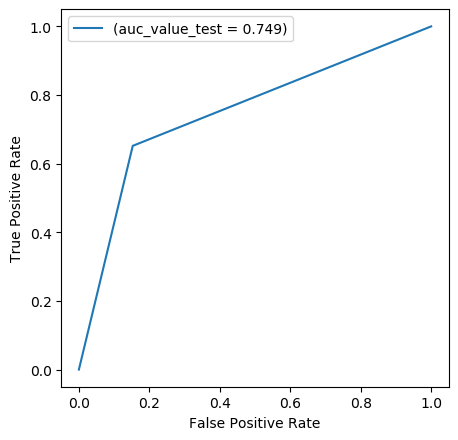

Confusion Matrix: 


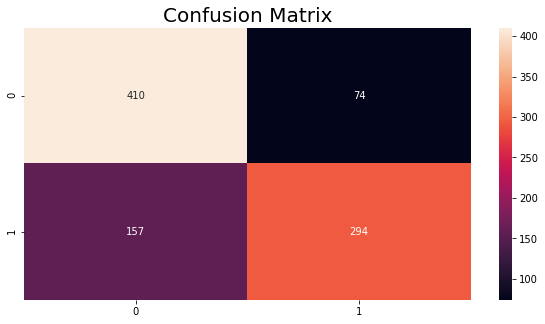

In [82]:
result(model_6)

# Comparing Models

In [83]:
from tabulate import tabulate

In [86]:
#create metrics table where target=1

data_table = [["Logistic Regression", 0.82,0.74,0.78 , 0.8], 
        ["Random Forest", 0.81,0.69,0.75, 0.77], 
        ["KNN",   0.86,0.58,0.69, 0.75], 
        ["Decision Tress", 0.73, 0.73, 0.73, 0.74],
        ["SVM", 0.85,0.69, 0.76, 0.79],
        ["Naive Bayes", 0.78,0.78,0.78 , 0.79],
        ["XGBoost", 0.84,0.51,0.64, 0.72 ],
        ["CatBoost", 0.80,0.65,0.72, 0.75 ]]


  
#define header names
col_names = ["Models", "Precision", "Recall", "F1 Score", "Accuracy"]
  
#display table
print(tabulate(data_table, headers=col_names))

Models                 Precision    Recall    F1 Score    Accuracy
-------------------  -----------  --------  ----------  ----------
Logistic Regression         0.82      0.74        0.78        0.8
Random Forest               0.81      0.69        0.75        0.77
KNN                         0.86      0.58        0.69        0.75
Decision Tress              0.73      0.73        0.73        0.74
SVM                         0.85      0.69        0.76        0.79
Naive Bayes                 0.78      0.78        0.78        0.79
XGBoost                     0.84      0.51        0.64        0.72
CatBoost                    0.8       0.65        0.72        0.75


In [89]:
#create table where for AUC scores

data_auctable = [["Logistic Regression", 0.894, 0.795], 
        ["Random Forest", 0.985, 0.77], 
        ["KNN", 0.796, 0.74], 
        ["Decision Tress", 0.985, 0.74],
        ["SVM", 0.968, 0.79],
        ["Naive Bayes", 0.903, 0.79],
        ["XGBoost", 0.737, 0.711 ],
        ["CatBoost", 0.823, 0.75 ]]

  
#define header names
col_names_auc = ["Models", "auc_train", "auc_test"]
  
#display table
print(tabulate(data_auctable, headers=col_names_auc))

Models                 auc_train    auc_test
-------------------  -----------  ----------
Logistic Regression        0.894       0.795
Random Forest              0.985       0.77
KNN                        0.796       0.74
Decision Tress             0.985       0.74
SVM                        0.968       0.79
Naive Bayes                0.903       0.79
XGBoost                    0.737       0.711
CatBoost                   0.823       0.75


**As my data is balanced, I primarily focus on F1 score and Accuracy score metric to determine which is the best model in  predicting disaster tweets. Both Logistic Regression model and Naive Bayes looks like a good model as they have similar F1 score. Logistic Regression model has slightly better Accuracy score than the Naive Bayes model. However, while comparing the Logistic Regression Model and Naive Bayes model, I also now look at the model with a relatively lower "AUC score difference" between training and test set to minimize overfitting.** 

I find that Logistic Regression model performs better. 